In [1]:
import sys
sys.path.insert(1,'c:/code/gh/pymunk')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

In [3]:
import pymunk
from pymunk.vec2d import Vec2d

Loading chipmunk for Windows (64bit) [c:\code\gh\pymunk\pymunk\chipmunk64.dll]


In [4]:
def setup_space():
    space = pymunk.Space()
    space.gravity = 0,-9820
    space.damping = 0.99
    return space


In [5]:
def setup_balls(space):
    width = 600
    height = 600
    for x in range(-100,150,50):
        x += width / 2
        offset_y = height/2
        mass = 10
        radius = 25
        moment = pymunk.moment_for_circle(mass, 0, radius, (0,0))
        body = pymunk.Body(mass, moment)
        body.position = x, -125+offset_y
        body.start_position = Vec2d(body.position)
        shape = pymunk.Circle(body, radius)
        shape.elasticity = 0.9999999
        space.add(body, shape)
        pj = pymunk.PinJoint(space.static_body, body, (x, 125+offset_y), (0,0))
        space.add(pj)

Vec2d(400.0, 425.0) Vec2d(400.0, 175.0)
Vec2d(300.0, 425.0) Vec2d(300.0, 175.0)
Vec2d(200.0, 425.0) Vec2d(200.0, 175.0)
Vec2d(250.0, 425.0) Vec2d(250.0, 175.0)
Vec2d(350.0, 425.0) Vec2d(350.0, 175.0)


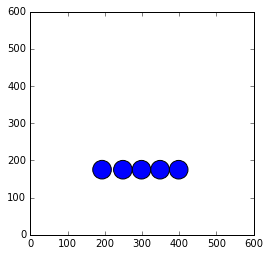

In [27]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 600), ylim=(0, 600))
ax.set_aspect("equal")

space = setup_space()
setup_balls(space)

for shape in space.shapes:
    p = plt.Circle(shape.body.position, shape.radius)
    shape.patch = p
    ax.add_patch(p)
for pin_joint in space.constraints:
    p1 = pin_joint.a.position + pin_joint.anchor_a
    p2 = pin_joint.b.position + pin_joint.anchor_b
    l = plt.Line2D([p1.x, p2.x], [p1.x, p2.x])
    print(p1, p2)
    ax.add_line(l)
    

space.shapes[0].body.apply_impulse_at_local_point((-12000,0))
    
def init():
    
    return []

def animate(dt):
    #we run the animation with half speed intentionally to make it a little nicer to look at
    for x in range(10):
        space.step(1/50/10/2)
    for shape in space.shapes:
        shape.patch.center = shape.body.position
    return []

frames = 210
frames = 1
# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=20, blit=False)

HTML(anim.to_html5_video())

In [22]:
ax.add_line?

In [29]:
ax?